<a href="https://colab.research.google.com/github/aless820/2022_ML_Earth_Env_Sci/blob/main/Personal_project_first_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Projet perso ML - Alessandro Giovanardi

# Week 2 pour linear regression
# Week 3 pour random forest

import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving LGS1_2021.xlsx to LGS1_2021.xlsx
Saving LGS2_2021.xlsx to LGS2_2021.xlsx


In [ ]:
# data1 = pd.read_mat(io.bytesIO(uploaded['LGS1_2021.mat']))
import pandas as pd
#data1  = io.loadmat('LGS1_2021.mat')
#data2  = io.loadmat('LGS2_2021.mat')

data1 = pd.read_excel(io.BytesIO(uploaded['LGS1_2021.xlsx']))
data2 = pd.read_excel(io.BytesIO(uploaded['LGS2_2021.xlsx']))

#T = data1 [:,0]
#Q = data1 [:,1]
#C = data1 [:,3]
#QC = data1 [:,5]

#T2 = data2 [:,0]
#Q2 = data2 [:,1]
#C2 = data2 [:,3]
#QC2 = data2 [:,5]

print(data1)
print(data2)

             T    C  SD_C         Q      SD_Q   QC  SD_QC  Unnamed: 7  \
0      162.451  0.0   0.0  4.764942  0.248893  0.0    0.0         0.0   
1      162.455  0.0   0.0  4.887735  0.247439  0.0    0.0         0.0   
2      162.458  0.0   0.0  4.635561  0.250406  0.0    0.0         0.0   
3      162.462  0.0   0.0  4.642283  0.250328  0.0    0.0         0.0   
4      162.465  0.0   0.0  4.657201  0.250155  0.0    0.0         0.0   
...        ...  ...   ...       ...       ...  ...    ...         ...   
28760  271.424  0.0   0.0  1.478574  0.249638  0.0    NaN         NaN   
28761  271.431  0.0   0.0  1.440417  0.250303  0.0    NaN         NaN   
28762  271.438  0.0   0.0  1.391400  0.251318  0.0    NaN         NaN   
28763  271.444  0.0   0.0  1.361291  0.252038  0.0    NaN         NaN   
28764  271.444  0.0   0.0  1.361291  0.252038  0.0    NaN         NaN   

       Unnamed: 8  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...

In [ ]:
# Normalized input variables

from sklearn.preprocessing import MinMaxScaler

# MIN MAX SCALING
minmax_scale = MinMaxScaler().fit(data1[['C','Q']])
df_minmax = minmax_scale.transform(data1[['C', 'Q']])

print('\n********** Normalisation1*********\n')
 
print('Moyenne apres le Min max Scaling :\nC={:.2f}, Q={:.2f}'
.format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))
 
print('\n')
 
print('Valeur minimale et maximale pour la feature C apres min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,0].min(), df_minmax[:,0].max()))
 
print('\n')
 
print('Valeur minimale et maximale pour la feature Q apres min max scaling : \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,1].min(), df_minmax[:,1].max()))


minmax_scale2 = MinMaxScaler().fit(data2[['C2','Q2']])
df_minmax2 = minmax_scale.transform(data2[['C2', 'Q2']])

print('\n********** Normalisation2*********\n')
 
print('Moyenne apres le Min max Scaling :\nC2={:.2f}, Q2={:.2f}'
.format(df_minmax2[:,0].mean(), df_minmax2[:,1].mean()))
 
print('\n')
 
print('Valeur minimale et maximale pour la feature C2 apres min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax2[:,0].min(), df_minmax2[:,0].max()))
 
print('\n')
 
print('Valeur minimale et maximale pour la feature Q2 apres min max scaling : \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax2[:,1].min(), df_minmax2[:,1].max()))


********** Normalisation1*********

Moyenne apres le Min max Scaling :
C=0.16, Q=0.45


Valeur minimale et maximale pour la feature C apres min max scaling: 
MIN=0.00, MAX=1.00


Valeur minimale et maximale pour la feature Q apres min max scaling : 
MIN=0.00, MAX=1.00

********** Normalisation2*********

Moyenne apres le Min max Scaling :
C2=0.13, Q2=0.51


Valeur minimale et maximale pour la feature C2 apres min max scaling: 
MIN=-0.01, MAX=1.15


Valeur minimale et maximale pour la feature Q2 apres min max scaling : 
MIN=0.07, MAX=1.24


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- C2
- Q2
Feature names seen at fit time, yet now missing:
- C
- Q

  warnings.warn(message, FutureWarning)


In [ ]:
# splitting the data into train, test, valid
from sklearn.model_selection import train_test_split
import numpy as np

# set % of data to be used for training
train_size=.80

# set % of data to be used for testing
test_size=.20

# set % of data to be used for testing
valid_size=.10

rnd_seed = 42

X = data2[['C2']]
y = data2[['Q2']]

X_st_dev = np.std(X)
y_st_dev = np.std(y)
print("Standard deviation of the given list: " + str(X_st_dev))
print("Standard deviation of the given list: " + str(y_st_dev))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size = test_size, random_state = rnd_seed)
#X_val, X_test, y_val, y_test = train_test_split(mnist.data, mnist.target, test_size=1000, train_size = 1000)
#X_val, X_test, y_val, y_test = train_test_split(X, y, mnist.target, test_size=1000, train_size = 1000)

#X_train
#X_test

Standard deviation of the given list: C2    0.911066
dtype: float64
Standard deviation of the given list: Q2    2.290203
dtype: float64


squared error is C2    0.0
Q2    0.0
dtype: float64
mean squared error is C2    0.0
Q2    0.0
dtype: float64
root mean square error is C2    0.0
Q2    0.0
dtype: float64
R square is C2    NaN
Q2    1.0
dtype: float64


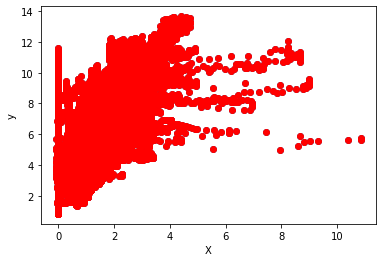

In [ ]:

import numpy as np 
import matplotlib.pyplot as plt 
  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm

n = np.size(X) 
  
X_mean = np.mean(X) 
y_mean = np.mean(y) 
X_mean,y_mean 
  
Sxy = np.sum(X*y)- n*X_mean*y_mean 
Sxx = np.sum(X*X)-n*X_mean*X_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*X_mean 

y_pred = b1 * X + b0 

error = y - y_pred 
se = np.sum(error**2) 
print('squared error is', se) 
  
mse = se/n   
rmse = np.sqrt(mse) 
print('root mean square error is', rmse) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


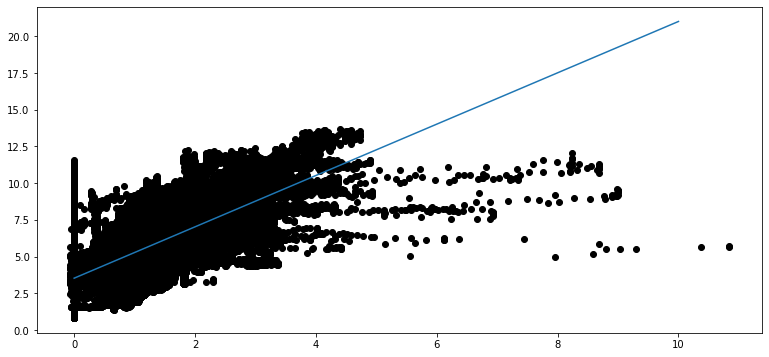

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Instantiate the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X, y)

#Instantiate a figure having size 13,6
fig, ax = plt.subplots(figsize = (13,6))
ax.scatter(X, y, c='black')

reg_x = np.linspace(0,10).reshape(-1,1)
reg_y = lin_reg.predict(reg_x)

ax.plot(reg_x,reg_y)
#ax.autoscale(axis='x', tight=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the classifiers on the training set
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

# Calculate the prediction of the classifier over my test set
RFC_pred = RFC.predict(X_test)

print(accuracy_score(y_test, RFC_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ValueError: ignored